# Reccomender System Project:  Book-Crossing

###  Recommendation engines are designed to process large amounts of data to identify potential user preferences.

#### There are two primary methodologies
* Collaborative filtering
* Content-based filtering

#### Dataset: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

### Primary goal of project: To explore the Book dataset, select the best algorithm to predict user preference, and to productionize (develop function) model for future use.

### Due to the large size of the data the initial analysis will be for users that are in between the age of 20-26. However, with sharing of platforms such as netflix age groups and idenitities are masked by many so the final product will have an age input.

* **Problem Definition** We are attempting to reccomend books a user may be interested in.
* **Data Description** 
* **Model Description** 
* **Model Evaluation** 


In [264]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
from pandas.io import sql
from scipy.spatial.distance import cosine, euclidean, correlation
import sqlite3
import os
#import FinalAssignmentFuncs as FA
import DataManagement as FA
print(os.getcwd())

C:\Users\w47593\PythonScripts\Ipython


In [265]:
#Import Datasets
Books =  pd.read_csv('BX-Books.csv',sep=';',escapechar='\\')
Users =  pd.read_csv('BX-Users.csv',sep=';')
Ratings =  pd.read_csv('BX-Book-Ratings.csv',sep=';')

In [266]:
## Rename columns
Ratings.rename(columns={'User-ID': 'UserID' }, inplace=True)
Ratings.rename(columns={'Book-Rating': 'BookRating' }, inplace=True)

Users.rename(columns={'User-ID': 'UserID'}, inplace=True)
Books.rename(columns={'Book-Title': 'BookTitle'}, inplace=True)
Books.rename(columns={'Book-Author': 'BookAuthor'}, inplace=True)
Books.rename(columns={'Year-Of-Publication': 'YearPublished'}, inplace=True)

Books['BookTitle'] = Books['BookTitle'].str.decode('iso-8859-1').str.encode('utf-8')
Books['BookAuthor'] = Books['BookAuthor'].str.decode('iso-8859-1').str.encode('utf-8')

In [267]:
#Dropping Image Links
Books = Books.ix[:, 0:4]
Books.head(5)

,ISBN,BookTitle,BookAuthor,YearPublished
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999


In [268]:
Users.head(5)

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",NaN


In [269]:
Ratings.head(5)

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Merge Data Sets

In [270]:
FA.df2sqlite(Books,'Project.sqlite','Books')
FA.df2sqlite(Ratings,'Project.sqlite','Ratings')
FA.df2sqlite(Users,'Project.sqlite','Users')

In [271]:
conn=sqlite3.connect('Project.sqlite')
conn.text_factory = str

query = "CREATE INDEX Bk_ISBN ON Books (ISBN);"
conn.execute(query)

query = "CREATE INDEX RT_ISBN ON Ratings (ISBN);"
conn.execute(query)
query = "CREATE INDEX RT_UserID ON Ratings (UserID);"
conn.execute(query)

query = "CREATE INDEX Users_UserID ON Users (UserID);"
conn.execute(query)

conn.close() 

In [272]:
conn=sqlite3.connect('Project.sqlite')
conn.text_factory = str
Users = sql.read_sql("select * from Ratings tbl1 \
                       inner join Books tbl2 on tbl1.ISBN = tbl2.ISBN  \
                       inner join Users tbl3 on tbl1.UserID = tbl3.UserID order by UserID,Location,ISBN",conn)
conn.close() 

In [273]:
Users = Users.iloc[:,[0,1,2,4,5,6,8,9]]
Users.head(5)

,UserID,ISBN,BookRating,BookTitle,BookAuthor,YearPublished,Location,Age
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,"stockton, california, usa",18
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,"timmins, ontario, canada",NaN
2,8,0060973129,0,Decision in Normandy,Carlo D'Este,1991,"timmins, ontario, canada",NaN
3,8,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,"timmins, ontario, canada",NaN
4,8,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,"timmins, ontario, canada",NaN


##Data Exploration

* **Top Ten Reviewed Books** 
* **Top Ten Reviews by Age** 
* **Top Ten Locations** 
* **Top Ten Authors**

In [274]:
%matplotlib  inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [275]:
## Book
Data = Users.groupby('BookTitle').size().reset_index()
Data.columns = ['BookTitle','Total']
Data = Data.sort(['Total'], ascending=[False])
Data = Data.head(10)
Data = Data.set_index('BookTitle')

## Age
Age = Users.groupby('Age').size().reset_index()
Age.columns = ['Age','Total']
Age = Age.sort(['Total'], ascending=[False])
Age = Age.head(10)
Age = Age.set_index('Age')

## Location
Location = Users.groupby('Location').size().reset_index()
Location.columns = ['Location','Total']
Location = Location.sort(['Total'], ascending=[False])
Location = Location.head(10)
Location = Location.set_index('Location')

## Author
Author = Users.groupby('BookAuthor').size().reset_index()
Author.columns = ['BookAuthor','Total']
Author = Author.sort(['Total'], ascending=[False])
Author = Author.head(10)
Author = Author.set_index('BookAuthor')

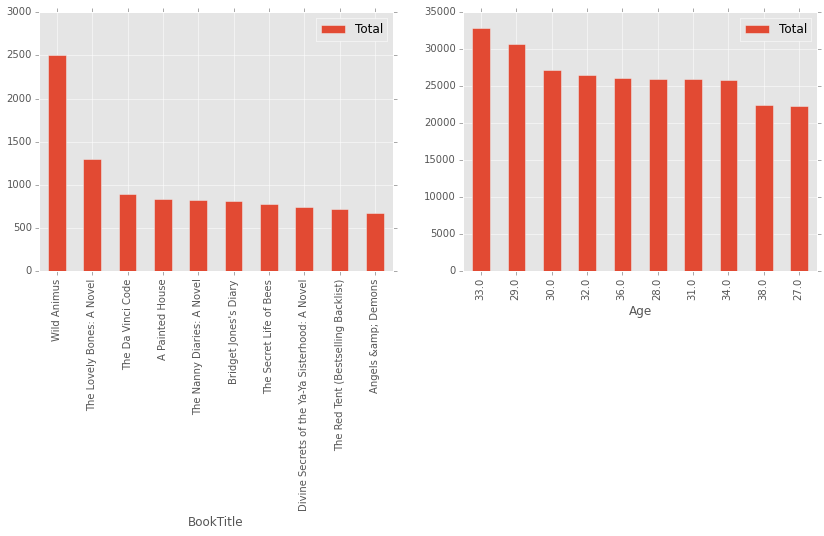

In [276]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(left=.2, bottom=.1, right=2, top=1, wspace=.2, hspace=2)
Data.plot(kind='bar',ax=axs[0])
Age.plot(kind='bar',ax=axs[1])


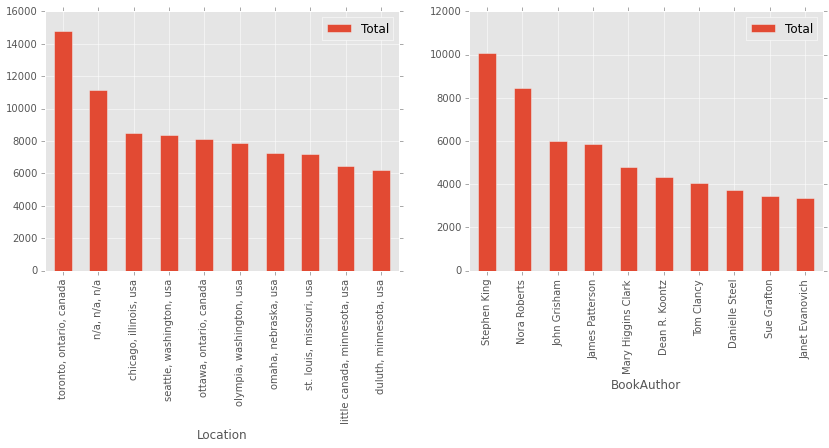

In [277]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(left=.2, bottom=.1, right=2, top=1, wspace=.2, hspace=2)
Location.plot(kind='bar',ax=axs[0])
Author.plot(kind='bar',ax=axs[1])

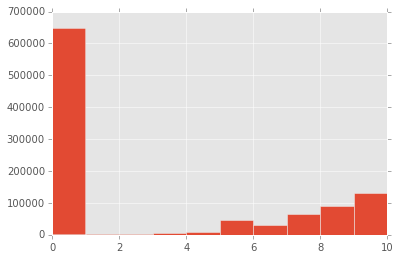

In [278]:
Users['BookRating'].hist()

## After analyzing the data we know that we need to perform variable imputation

In [279]:
Users['Age'] = Users['Age'].fillna(Users['Age'].median())

In [280]:
Users.head(5)

,UserID,ISBN,BookRating,BookTitle,BookAuthor,YearPublished,Location,Age
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,"stockton, california, usa",18
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,"timmins, ontario, canada",35
2,8,0060973129,0,Decision in Normandy,Carlo D'Este,1991,"timmins, ontario, canada",35
3,8,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,"timmins, ontario, canada",35
4,8,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,"timmins, ontario, canada",35


### Feature Engineering

* Location into country (After viewing how many missing values and inccorect records we have we will not be performing this operation)
* Binning (Discretization) Age

In [281]:
'''
li = []
Users['Country']=''
for i in range(1,len(Users)):
    try:
        Users['Country'][i] = Users['Location'][i].split(',')[2]
    except:
        print(str(i) +' ' + Users['Country'][i])
        li.append(Users['User-ID'][i])
        
#Update our missing data; based upon google we can infer both of these refer to cities in united states
for i in li:
    Users.loc[Users['User-ID'] == i, 'Country'] = 'usa'  
    
Users["Country"]=Users["Country"].map(str.strip)
Frequency = Users.groupby('Country').size().reset_index()   

Frequency.head(5)
'''


'\nli = []\nUsers[\'Country\']=\'\'\nfor i in range(1,len(Users)):\n    try:\n        Users[\'Country\'][i] = Users[\'Location\'][i].split(\',\')[2]\n    except:\n        print(str(i) +\' \' + Users[\'Country\'][i])\n        li.append(Users[\'User-ID\'][i])\n        \n#Update our missing data; based upon google we can infer both of these refer to cities in united states\nfor i in li:\n    Users.loc[Users[\'User-ID\'] == i, \'Country\'] = \'usa\'  \n    \nUsers["Country"]=Users["Country"].map(str.strip)\nFrequency = Users.groupby(\'Country\').size().reset_index()   \n\nFrequency.head(5)\n'

### Discretize Age 

In [282]:
Users = Users.fillna(0)
Users['AgeG']= pd.cut(Users.Age, [0,5,10,13,15,18,20,23,25,30,35,40,50,60,70,80,90,999])

In [283]:
Users.head(5)

,UserID,ISBN,BookRating,BookTitle,BookAuthor,YearPublished,Location,Age,AgeG
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,"stockton, california, usa",18,"(15, 18]"
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,"timmins, ontario, canada",35,"(30, 35]"
2,8,0060973129,0,Decision in Normandy,Carlo D'Este,1991,"timmins, ontario, canada",35,"(30, 35]"
3,8,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,"timmins, ontario, canada",35,"(30, 35]"
4,8,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,"timmins, ontario, canada",35,"(30, 35]"


# Build out Matricies

In [286]:
Matrix = Users[(Users['AgeG'] == '(15, 18]')]
print(len(Matrix))
Matrix.head(5)

17328


,UserID,ISBN,BookRating,BookTitle,BookAuthor,YearPublished,Location,Age,AgeG
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,"stockton, california, usa",18,"(15, 18]"
52,42,0553582747,7,From the Corner of His Eye,Dean Koontz,2001,"appleton, wisconsin, usa",17,"(15, 18]"
84,78,0394895894,8,"The Ruby in the Smoke (Sally Lockhart Trilogy,...",PHILIP PULLMAN,1988,"oakland, california, usa",18,"(15, 18]"
164,185,0380778556,10,Rebecca,Daphne Du Maurier,1994,"baton rouge, louisiana, usa",17,"(15, 18]"
165,185,0451525221,0,Scarlet Letter,Nathaniel Hawthorne,1993,"baton rouge, louisiana, usa",17,"(15, 18]"


In [287]:
dense_matrix = Matrix.pivot_table(values="BookRating", index=["UserID"], columns=["ISBN"], aggfunc=np.sum)
print "Shape of the user-item matrix: %d x %d" % dense_matrix.shape

Shape of the user-item matrix: 2737 x 12921


In [298]:
dense_matrix = dense_matrix.fillna(0)
dense_matrix.tail(5)

ISBN    0001900277  0002234947  0002251760  0004102169  0004133803  \
UserID                                                               
278098           0           0           0           0           0   
278204           0           0           0           0           0   
278279           0           0           0           0           0   
278461           0           0           0           0           0   
278755           0           0           0           0           0   

ISBN    0004586298  000470763X  0004709721  000470973X  0006367763  \
UserID                                                               
278098           0           0           0           0           0   
278204           0           0           0           0           0   
278279           0           0           0           0           0   
278461           0           0           0           0           0   
278755           0           0           0           0           0   

ISBN       ...    

In [289]:
# Correlation  Between User 278279 & 42
correlation(dense_matrix.loc[278279], dense_matrix.loc[42])

1.0001066598437964

In [290]:
Data = Matrix.groupby('ISBN').size().reset_index()
Data.columns = ['ISBN','Total']
Data = Data.sort(['Total'], ascending=[False])
Data = Data.head(10)
Data = Data.values

Input = "".join(str(Data[:,0]))
Input =Input.replace('[','')
Input =Input.replace(']','')
Input = Input.replace(' ',',')

sqlquery = "Select * from Books where ISBN in (" + Input + ");"
sqlquery

"Select * from Books where ISBN in ('0971880107','0446310786','0316666343','0345339681','0316769487'\n,'0440219078','0345337662','0345370775','1558744630','059035342X');"

In [291]:
conn=sqlite3.connect('Project.sqlite')
conn.text_factory = str
TopBooks = sql.read_sql(sqlquery,conn)
conn.close() 
TopBooks

,ISBN,BookTitle,BookAuthor,YearPublished
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002
1,0316769487,The Catcher in the Rye,J.D. Salinger,1991
2,0345337662,Interview with the Vampire,Anne Rice,1993
3,0345339681,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986
4,0345370775,Jurassic Park,Michael Crichton,1999
5,0440219078,The Giver (21st Century Reference),LOIS LOWRY,1994
6,0446310786,To Kill a Mockingbird,Harper Lee,1988
7,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999
8,0971880107,Wild Animus,Rich Shapero,2004
9,1558744630,Chicken Soup for the Teenage Soul (Chicken Sou...,Jack Canfield,1997


### Lets see if the hobbit and Harry potter are similar

In [292]:
correlation(dense_matrix['059035342X'], dense_matrix['0345339681'])

1.0043688324693139

In [125]:
def top_k_items(item_number, k):
    # copy the dense matrix and transpose it so each row represents an item
    df_sim = dense_matrix.transpose()
    # remove the active item 
    df_sim = df_sim.loc[df_sim.index != item_number]
    # calculate the distance between the given item for each row (apply the function to each row if axis = 1)
    df_sim["distance"] = df_sim.apply(lambda x: euclidean(dense_matrix[item_number], x), axis=1)
    # return the top k from the sorted distances
    return df_sim.sort("distance").head(k)["distance"]   


In [293]:
# Jurassic Park
top_k_items('0345337662', 5)

ISBN
0345435419    21.400935
0060199490    21.633308
015204566X    21.633308
0385337116    21.633308
0618129111    21.633308
Name: distance, dtype: float64

In [294]:
def top_k_users(user_number, k):
    # no need to transpose the matrix this time because the rows already represent users
    # remove the active user
    df_sim = dense_matrix.loc[dense_matrix.index != user_number]
    # calculate the distance for between the given user and each row
    df_sim["distance"] = df_sim.apply(lambda x: euclidean(dense_matrix.loc[user_number], x), axis=1)
    # return the top k from the sorted distances
    return df_sim.sort("distance").head(k)["distance"] 

In [302]:
top_k_users(720  , 5)

C:\Users\w47593\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


UserID
2         0
149613    0
149302    0
148737    0
49632     0
Name: distance, dtype: float64

In [301]:
from sklearn.neighbors import NearestNeighbors
# create an instance of the learner and specify it to use Euclidean distance
nbrs = NearestNeighbors(metric="euclidean")
# fit the learner using all user ratings except for User 3
nbrs.fit(dense_matrix.loc[dense_matrix.index != 2])
# the learner returns the distances and locations of the 5 nearest neighbors of User 3
distances, locs = nbrs.kneighbors(dense_matrix.loc[2], 5)
# retrieve these neighbors from the user-item matrix based on the locations
sim_users = dense_matrix.loc[dense_matrix.index != 2].iloc[locs.ravel()].index
# print the user indexes and the distances
for sim_user, dist in zip(sim_users, distances.ravel()):
    print sim_user, dist

13980 0.0
1007 0.0
720 0.0
6669 0.0
469 0.0


In [ ]:
#http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/
#http://nbviewer.ipython.org/gist/fonnesbeck/5850413
#http://pbpython.com/pandas-pivot-table-explained.html    
#http://nbviewer.ipython.org/urls/db.tt/vQPduJzH    
    
#http://www.mickaellegal.com/blog/2014/1/30/how-to-build-a-recommender
#http://nbviewer.ipython.org/github/nicolasfauchereau/NIWA_Python_seminars/blob/master/3_Numpy_and_Scipy.ipynb

#https://www.youtube.com/playlist?list=PLD0F06AA0D2E8FFBA
#http://www2.informatik.uni-freiburg.de/~cziegler/BX/
#http://nbviewer.ipython.org/github/marcelcaraciolo/big-data-tutorial/blob/master/tutorial/1-Playing-with-Recommender-Systems.ipynb
#https://www.coursera.org/learn/recommender-systems
#http://nbviewer.ipython.org/gist/glamp/20a18d52c539b87de2af
#http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/

#http://guidetodatamining.com/guide/ch2/DataMining-ch2.pdf
    

Define a practical data mining problem.
Use real-world data/model/knowledgebase
Solve the problem using knowledge learnt from this course. 

Submit a report (limited to 4 pages, 12-point font, 1.5-line spacing):
Problem definition
Data description
Model description
Model evaluation and result interpretation
Appendix (e.g. technical details and/or codes)
Use diagrams, figures, pseudo codes, tables if applicable. 